[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/takumi-saka-mo/DEVIRSIFY_Analysis/blob/main/notebooks/ソフトバンクvs楽天.ipynb)

# ソフトバンク株式会社 vs 楽天グループ株式会社

ソフトバンク株式会社...移動通信サービスの提供、携帯端末の販売、固定通信サービスの提供、インターネット接続サービスの提供<br>
楽天グループ株式会社...ECサイト, インベストメント, フィンテック<br>



### 参照
https://www.softbank.jp/corp/set/data/ir/documents/financial_reports/fy2023/pdf/sbkk_financial_report_20240509.pdf

In [ ]:
# calculate_EXVAL ディレクトリに格納されているクラスをインストール
! pip install git+https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis.git
from calculate_EXVAL import DiversifyApproach
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ソフトバンク株式会社

**財務データ参照先**<br>
https://www.softbank.jp/corp/set/data/ir/documents/financial_reports/fy2023/pdf/sbkk_financial_report_20240509.pdf


In [2]:
# ソフトバンク株式会社の必要データを準備
softbank_data = pd.read_csv(
    "https://raw.githubusercontent.com/takumi-saka-mo/DEVIRSIFY_Analysis/main/data/Softbank_category.csv",
    encoding = "UTF-8"
    ).set_index("Category")


softbank_data

,Consumer,Enterprise,Distribution,Media,Finance
Category,,,,,
Sales,4955,1672,262,1980,-58


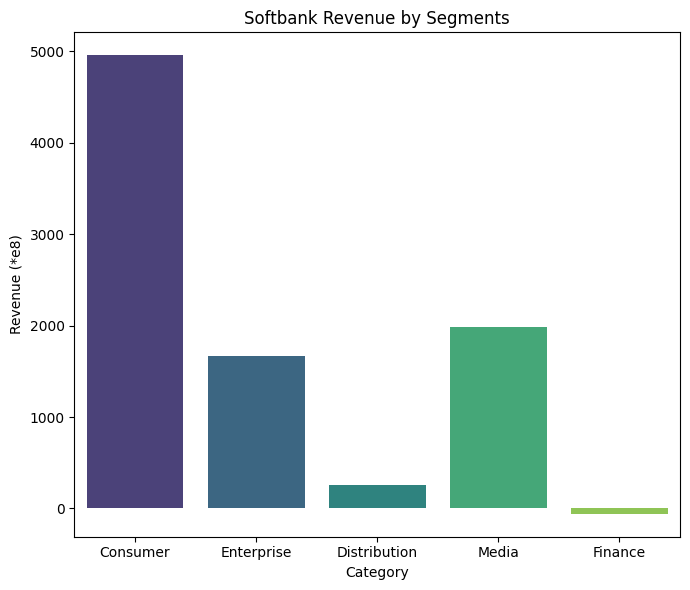

In [3]:
df = softbank_data.T.reset_index()
df.columns = ["Category", "Sales"]
plt.figure(figsize=(7, 6))
sns.barplot(data = df, x = "Category", y = "Sales", hue = "Category",  palette = "viridis")
plt.title("Softbank Revenue by Segments")
plt.ylabel("Revenue (*e8)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### セグメント分類について
**参照**
<br>https://group.softbank/system/files/pdf/ir/financials/annual_reports/financial-report_fy2024_ja.pdf
- コンシューマ<br>
(a) モバイルサービス及び携帯端末の販売<br>
(b)ブロードバンドサービス<br>
(c)でんき<br>
- エンタープライズ<br>
(a) モバイルサービス及び携帯端末レンタルサービス<br>
(b)固定通信サービス(音声伝送サービスおよびデータ伝送サービス)<br>
(c)ソリューション等(データセンター、クラウド、セキュリティ、グローバル、AI、IoT、機器販売)<br>
- ディストリビューション<br>
法人顧客向けのICT、クラウド、IoTソリューション等に対応したハードウエア、ソフトウエア、サービスなどの商材、個人顧客向けのモバイルアクセサリー、PCソフトウエア、IoTプロダクト等の商材の販売
- メディア・EC<br>
(a) メディア(検索広告、アカウント広告、ディスプレイ広告の収入)<br>
(b)コマース(アスクルグループの物品販売サービス、「ZOZOTOWN」や「 Yahoo!オークション」等のEC関連サービスの収入)<br>
- ファイナンス<br>
主にQRコードによる代金決済サービスの提供により生じる加盟店手数料


In [4]:
# セグメント値の設定
seg1_value = softbank_data["Consumer"].iloc[0] * 1e8 # 単位 : 億円
seg2_value = softbank_data["Enterprise"].iloc[0] * 1e8
seg3_value = softbank_data["Distribution"].iloc[0] * 1e8
seg4_value = softbank_data["Media"].iloc[0] * 1e8
seg5_value = softbank_data["Finance"].iloc[0] * 1e8

seg_list = [seg1_value, seg2_value, seg3_value, seg4_value, seg5_value]

# 専業企業リスト
Consumer = [
    "9432.T",  # NTT
    "9433.T",  # KDDI
    "9437.T",  # 楽天G
    "3844.T",  # コムシード株式会社（MVNO事業）
    "9424.T",  # 日本通信（MVNO、格安SIM）
    "9501.T",  # 東京電力HD（TEPCO、電気）
    "9503.T",  # 関西電力（電力、ガス事業）
    "9513.T",  # J-Power（卸電力取引）
    "3659.T",  # ネクソン（ブロードバンド関連）
    "3774.T"   # インターネットイニシアティブ
    ]
Enterprise = [
    "9432.T",  # NTT
    "9433.T",  # KDDI
    "9437.T",  # 楽天G
    "3774.T",  # インターネットイニシアティブ
    "2327.T",  # NSD（ネットワークサービス、データ伝送）
    "8056.T",  # BIPROGY
    "6762.T",  # TDK（IoT機器販売）
    "6702.T",  # 富士通（クラウド、AI、IoT）
    "6701.T",  # NEC（セキュリティ、クラウド）
    "9749.T",  # 富士ソフト（AI、IoT、クラウド）
    "9613.T",  # NTTデータ（データ伝送、AI、IoT）
    "9616.T"   # 共立システム（セキュリティ、システム販売）
    ]
Distribution = [
    "4768.T",  # 大塚商会
    "8056.T",  # BIPROGY
    "9719.T",  # SCSK
    "9749.T",  # 富士ソフト株式会社
    "4307.T",  # 野村総合研究所
    "6701.T",  # NEC
    "6702.T",  # 富士通
    "6703.T"   # 沖電気工業
    ]
Media = [
    "4689.T",  # Zホールディングス（LINE、Yahoo! JAPANを運営）
    "4755.T",  # 楽天グループ（楽天市場、楽天広告など）
    "6098.T",  # リクルートホールディングス（Indeed、SUUMOなど）
    "4324.T",  # 電通グループ（広告代理店、デジタル広告）
    "4812.T",   # 電通国際情報サービス（ISID、デジタルマーケティング）
    "2432.T",  # ディー・エヌ・エー（Mobage、アプリ広告）
    "2121.T",  # ミクシィ（mixi、モンストの広告運用）
    "4385.T",  # メルカリ（フリマアプリ、EC広告）
    "4477.T",  # BASE（ネットショップ作成支援サービス）
    "3926.T"   # オープンドア（旅行情報サイト「トラベルコ」）
    ]
Finance = [
    "3769.T",  # GMOペイメントゲートウェイ (決済代行サービス)
    "4051.T",  # GMOフィナンシャルゲート (QRコード決済対応端末)
    "4072.T",  # 電算システム (収納代行・決済サービス)
    "4689.T",  # Zホールディングス (PayPay、LINE Pay)
    "4755.T",  # 楽天グループ (楽天ペイ)
    "4015.T",  # ペイロール (決済クラウド)
    "2428.T",  # ウェルネット (QRコード決済、収納代行)
    "3623.T",  # ビリングシステム (決済プラットフォーム)
    "4385.T",  # メルカリ (メルペイ - QRコード決済)
    "4477.T",  # BASE (ネットショップ作成、QRコード決済)
    "4449.T"   # ギフティ (電子ギフト決済)
    ]
specialized_tickers = [Consumer, Enterprise, Distribution,Media, Finance]

# DiversifyApproach
div_approach = DiversifyApproach(
    ticker = "9984.T", # SoftBank
    specialized_tickers = specialized_tickers,
    data = softbank_data
)

# ソフトバンクグループの企業価値の計算
value = div_approach.calculate_value()
print(f"企業価値: {value}")

# EXVAL（超過価値）の計算
exval = div_approach.calculate_exval(seg_list)
print(f"超過価値 (EXVAL): {exval}")

企業価値: 34814635080128.0
超過価値 (EXVAL): 3.1461828077685627


In [6]:
import yfinance as yf

# ソフトバンクグループ (9984.T) のデータを取得
ticker = "9984.T"
softbank = yf.Ticker(ticker)

# 時価総額（Market Cap）を取得
softbank_info = softbank.info
market_cap = softbank_info.get("marketCap", None)  # 市場価値（時価総額）

# 結果の表示
print(f"ソフトバンクグループの時価総額: {market_cap} 円")
total_debt = yf.Ticker(ticker).balance_sheet.loc["Total Debt"].iloc[0]
value = market_cap + total_debt
print(f"ソフトバンクグループ企業価値{value}")
34814635080128

ソフトバンクグループの時価総額: 13452604080128 円
ソフトバンクグループ企業価値34814635080128.0


## 楽天グループ株式会社

In [6]:
# ソフトバンク株式会社の必要データを準備
rakuten_data = pd.read_csv(
    "https://raw.githubusercontent.com/takumi-saka-mo/DEVIRSIFY_Analysis/main/data/RAKUTEN.csv",
    encoding = "UTF-8"
    ).set_index("Category")


rakuten_data

,Services,FinTech,Mobile
Category,,,
Sales,314570,208229,105986


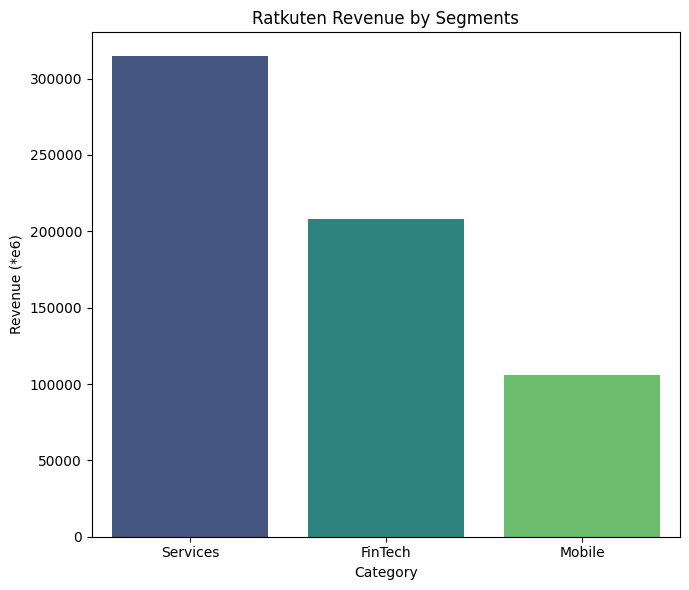

In [7]:
df = rakuten_data.T.reset_index()
df.columns = ["Category", "Sales"]
plt.figure(figsize=(7, 6))
sns.barplot(data = df, x = "Category", y = "Sales", hue = "Category",  palette = "viridis")
plt.title("Ratkuten Revenue by Segments")
plt.ylabel("Revenue (*e6)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### セグメント分類について
**参照**
<br>https://group.softbank/system/files/pdf/ir/financials/annual_reports/financial-report_fy2024_ja.pdf
- コンシューマ<br>
(a) モバイルサービス及び携帯端末の販売<br>
(b)ブロードバンドサービス<br>
(c)でんき<br>
- エンタープライズ<br>
(a) モバイルサービス及び携帯端末レンタルサービス<br>
(b)固定通信サービス(音声伝送サービスおよびデータ伝送サービス)<br>
(c)ソリューション等(データセンター、クラウド、セキュリティ、グローバル、AI、IoT、機器販売)<br>
- ディストリビューション<br>
法人顧客向けのICT、クラウド、IoTソリューション等に対応したハードウエア、ソフトウエア、サービスなどの商材、個人顧客向けのモバイルアクセサリー、PCソフトウエア、IoTプロダクト等の商材の販売
- メディア・EC<br>
(a) メディア(検索広告、アカウント広告、ディスプレイ広告の収入)<br>
(b)コマース(アスクルグループの物品販売サービス、「ZOZOTOWN」や「 Yahoo!オークション」等のEC関連サービスの収入)<br>
- ファイナンス<br>
主にQRコードによる代金決済サービスの提供により生じる加盟店手数料
